# Import

In [86]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import cv2

import os

from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Model

# Data

In [13]:
df = pd.read_csv('veri_onizleme.csv')
df.head()

,width,height,class,path
0,41,42,0,TrafficSignDatasets\closed_road\00015_00000_00...
1,40,37,0,TrafficSignDatasets\closed_road\00015_00000_00...
2,40,38,0,TrafficSignDatasets\closed_road\00015_00000_00...
3,42,38,0,TrafficSignDatasets\closed_road\00015_00000_00...
4,45,41,0,TrafficSignDatasets\closed_road\00015_00000_00...


In [34]:
df = df[['class', 'path']]

In [64]:
X = []
y = []

for i in range(df.shape[0]):
    img = cv2.imread(df.iloc[i]['path'], 1)
    img = cv2.resize(img, (32, 32))  # resize as you wish 28x28 or 32x32..
    X.append(img)
    y.append(df.iloc[i]['class'])

X = np.array(X)
y = np.array(y)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [68]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5135, 32, 32, 3)
(5135,)
(1712, 32, 32, 3)
(1712,)


In [72]:
# num of classes
K = len(set(y_train))
K

15

# Model

In [139]:
# Build the model
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Train on 5135 samples, validate on 1712 samples
Epoch 1/15
5135/5135 [==============================] - 4s 810us/sample - loss: 0.4777 - accuracy: 0.8946 - val_loss: 0.0909 - val_accuracy: 0.9796
Epoch 2/15
5135/5135 [==============================] - 2s 372us/sample - loss: 0.0373 - accuracy: 0.9889 - val_loss: 0.0411 - val_accuracy: 0.9889
Epoch 3/15
5135/5135 [==============================] - 2s 396us/sample - loss: 0.0483 - accuracy: 0.9852 - val_loss: 0.0462 - val_accuracy: 0.9889
Epoch 4/15
5135/5135 [==============================] - 3s 662us/sample - loss: 0.0339 - accuracy: 0.9903 - val_loss: 0.0268 - val_accuracy: 0.9936
Epoch 5/15
5135/5135 [==============================] - 3s 510us/sample - loss: 0.0132 - accuracy: 0.9961 - val_loss: 0.0414 - val_accuracy: 0.9942
Epoch 6/15
5135/5135 [==============================] - 3s 526us/sample - loss: 0.0180 - accuracy: 0.9953 - val_loss: 0.0497 - val_accuracy: 0.9883
Epoch 7/15
5135/5135 [==============================] - 3s 651us

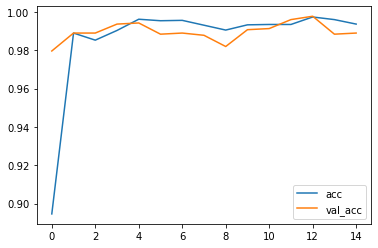

In [140]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

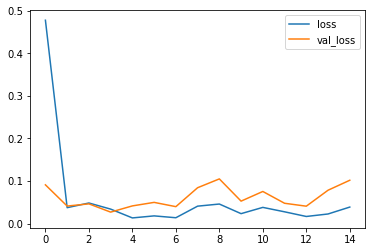

In [141]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Prediction

In [142]:
classes = {
    0: "closed_road",
    1: "left",
    2: "light_green",
    3: "light_red",
    4: "light_yellow",
    5: "not_left",
    6: "not_right",
    7: "no_entry",
    8: "parking_available",
    9: "parking_not_available",
    10: "right",
    11: "station_area",
    12: "stop",
    13: "straight_and_left",
    14: "straight_and_right"
}

In [143]:
def predict(img):
    img_resized = cv2.resize(img, (32, 32))
    img_resized = np.expand_dims(img_resized, axis=0)
    p = model.predict(img_resized)
    print(p)
    pmax = np.argmax(p)
    return classes[pmax]

In [156]:
testdir = 'random model testing/'
imagename = 'ileri_sag2.png'
img = cv2.imread(os.path.join(testdir+imagename), 1)

predict(img)

[[3.2212551e-19 6.3765703e-23 4.1011498e-13 4.9504836e-19 1.3667329e-16
  8.5533139e-18 1.6486656e-14 4.6757575e-18 2.5053654e-14 4.8034099e-27
  5.9981389e-25 1.6165940e-27 2.6522203e-26 7.5673136e-15 1.0000000e+00]]


'straight_and_right'

In [145]:
X_train[0].shape

(32, 32, 3)